In [25]:
from requests import get
import requests
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup as bs
from itertools import groupby

import datetime
import re
import urllib
import sys
import random
import pandas as pd
import sqlite3 as sql
import numpy as np
import nltk
import pickle
import gensim
import seaborn as sns
from functions.tokenize_and_lemmatize import *
from functions.get_wordnet_pos import *
from functions.add_ngrams import *
from functions.create_dictionary_corpus import *
from functions.compute_similarity import *

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# Download stopwords from NLTK
nltk.download('stopwords')
en_stop_words = set(nltk.corpus.stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
wordnet_lemmatizer = WordNetLemmatizer()
exclusion_list=[]
inclusion_list=[]
punctuations = "?:!.,;()&|$*-/\"''``“”"


log_directory= './logs2/'
token_dictionary_directory='./outputs2/'

[nltk_data] Downloading package wordnet to /Users/Home/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Home/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/Home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
month = 9;
year = 2017;
day = 22;

conn = sql.connect("all-the-news.db");
queryStr = "SELECT * FROM longform WHERE year="+str(year)+" AND month="+str(month)+" limit 100";
df = pd.read_sql_query(queryStr, conn);

#%%codecell
dfBig = df.drop(['url', 'section', 'digital', 'category', 'author'], axis=1);
dfBig = dfBig.sort_values(by=["date"], ascending=1);
print(dfBig.columns)

Index(['id', 'title', 'date', 'content', 'year', 'month', 'publication'], dtype='object')


In [26]:
text_lists = {}

titleList = dfBig['title'].tolist();
contentList = dfBig['title'].tolist();

for i in range(0, len(titleList), 1):
    title = titleList[i];
    text_lists[title] = [];
    output = contentList[i];
    text_lists[title].append(output)

In [27]:
file_text_dictionary_dir = ('./outputs2/','text_dictionary')
with open((file_text_dictionary_dir[0]+file_text_dictionary_dir[1] +'.pickle'), 'wb') as handle:
        pickle.dump(text_lists, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [28]:
params = {
    'text_lists': text_lists
    , 'lemmatizer': wordnet_lemmatizer
    , 'stop_words': en_stop_words
    , 'exclusion_list': exclusion_list
    , 'inclusion_list': inclusion_list
    , 'punctuations': punctuations
    , 'output_dir': './logs2/'
}

token_list = tokenize_and_lemmatize(params)

In [29]:
params = {
    'lemma_list':token_list['token_list']
    , 'n':'trigrams'
    , 'min_count': 4
    , 'delimiter': b' '
    , 'scoring': 'npmi'
    , 'threshold': 0.8
    , 'output_dir': './outputs2/'
}

ngrams_list = add_ngrams(params)
print("done");

done


In [30]:
print(text_lists[list(text_lists.keys())[0]][0])
print('\nSAMPLE TOKENIZED AND LEMMATIZED TOKENS:')
print(token_list['token_list'][list(text_lists.keys())[0]][0][0:50])
print('\nSAMPLE TOKENS WITH N-GRAMS:')
print (ngrams_list['ngrams_list'][list(text_lists.keys())[0]][0][0:50])

Cars Suck Up Data About You. Where Does It All Go? - The New York Times

SAMPLE TOKENIZED AND LEMMATIZED TOKENS:
['car', 'suck', 'data', 'go', 'new', 'york', 'time']

SAMPLE TOKENS WITH N-GRAMS:
['car', 'suck', 'data', 'go', 'new york time']


In [31]:
compare_docs = {k: ngrams_list['ngrams_list'][k] for k in list(ngrams_list['ngrams_list'])[0:20]}
query_doc = 10

params = {
    'document_dictionary':compare_docs
    , 'query_doc':10
    , 'output_dir':'./outputs2/'
}

create_dictionary_corpus = create_dictionary_corpus(params)

In [32]:
with open("./outputs2/document_dictionary.pickle", "rb") as input_file:
    dictionary = pickle.load(input_file)

with open("./outputs2/corpus.pickle", "rb") as input_file:
    corpus = pickle.load(input_file)

params = {
    'document_dictionary':dictionary
    ,'corpus':corpus
    , 'query_doc':10
}

compute_similarity = compute_similarity(params)

In [33]:
print('DICTIONARY OF ALL NGRAMS IN DOCUMENTS: ')
print({k: create_dictionary_corpus['dictionary'].token2id[k] for k in list(create_dictionary_corpus['dictionary'].token2id)[0:100]})
print('\nCORPUS FOR QUERY DOCUMENT: ')
print(create_dictionary_corpus['corpus'][query_doc])

DICTIONARY OF ALL NGRAMS IN DOCUMENTS: 
{'car': 0, 'data': 1, 'go': 2, 'new york time': 3, 'suck': 4, 'read': 5, 'bank': 6, 'better': 7, 'explain': 8, 'fee': 9, 'nudge': 10, 'overdraft': 11, 'rule': 12, 'stung': 13, 'u': 14, 'complies': 15, 'contradict': 16, 'deal': 17, 'iran': 18, 'monitor': 19, 'nuclear': 20, 'say': 21, 'trump': 22, 'un': 23, 'bros': 24, 'david': 25, 'family': 26, 'history': 27, 'studio': 28, 'thomson': 29, 'warner': 30, 'alien': 31, 'dear': 32, 'marooned': 33, 'princess': 34, 'connecticut': 35, 'home': 36, 'new york': 37, 'sale': 38, 'away': 39, 'controversial': 40, 'past': 41, 'restoration': 42, 'wipe': 43, 'damage': 44, 'exceed': 45, 'governor': 46, 'katrina': 47, 'may': 48, 'property': 49, 'seek': 50, 'solace': 51, 'texas': 52, 'weary': 53, 'entrepreneur': 54, 'focus': 55, 'labor': 56, 'policy': 57, 'shift': 58, 'worker': 59, '1992': 60, 'like': 61, 'party': 62, 'daily': 63, 'digital': 64, 'face': 65, 'future': 66, 'news': 67, 'publisher': 68, 'renewal': 69, 'red

In [34]:
print('\nRELEVANT NGRAMS IN QUERY DOCUMENT BASED ON TF-IDF: ')
for doc in compute_similarity['tf_idf'][corpus][query_doc:query_doc+1]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])


RELEVANT NGRAMS IN QUERY DOCUMENT BASED ON TF-IDF: 
[['1992', 0.58], ['like', 0.58], ['party', 0.58]]



SIMILARITY OF QUERY DOCUMENT COMPARED TO OTHER DOCUMENTS: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.99999994 0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
AxesSubplot(0.125,0.125;0.62x0.755)


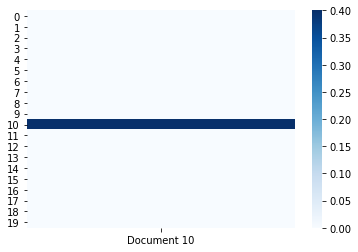

In [36]:
print('\nSIMILARITY OF QUERY DOCUMENT COMPARED TO OTHER DOCUMENTS: ')
print(compute_similarity['similarity_index'][compute_similarity['tf_idf'][corpus[query_doc]]])

print(sns.heatmap(compute_similarity['query_similarity'], cmap = 'Blues', vmin = 0, vmax = 0.4))

In [37]:
text_list = [items for document in compare_docs.values() for items in document]
            
sims_doc_tokens = sorted(enumerate(compute_similarity['similarity_index'][compute_similarity['tf_idf'][corpus[query_doc]]]), key=lambda item: -item[1])
for i, s in enumerate(sims_doc_tokens):
    print('\nSIMILARITY OF QUERY DOCUMENT TO DOCUMENT ' + str(s)) 
    print(text_list[i])


SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (10, 0.99999994)
['car', 'suck', 'data', 'go', 'new york time']

SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (0, 0.0)
['read', 'new york time']

SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (1, 0.0)
['stung', 'overdraft', 'fee', 'u', 'nudge', 'bank', 'explain', 'rule', 'better', 'new york time']

SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (2, 0.0)
['contradict', 'trump', 'un', 'monitor', 'say', 'iran', 'complies', 'nuclear', 'deal', 'new york time']

SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (3, 0.0)
['david', 'thomson', 'warner', 'bros', 'history', 'studio', 'family', 'new york time']

SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (4, 0.0)
['dear', 'marooned', 'alien', 'princess']

SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (5, 0.0)
['home', 'sale', 'new york', 'connecticut', 'new york time']

SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (6, 0.0)
['controversial', 'restoration', 'wipe', 'away', 'past', 'new york time']

SIMILARITY OF QUERY DOCUMENT TO DOCUMENT (7,